In [1]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

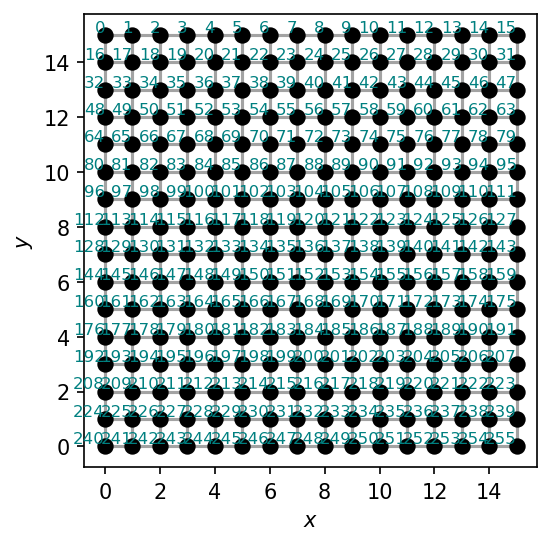

In [2]:
t = 1.0
mu = 0.5 * t
delta = complex(t, 0.0)
dim_H_BdG = 4
n = 1
phase_vortex = np.exp(n * np.pi * 1j)

N = 16
lattice = SquareLattice(N, "open")

lattice.plot(True)
num_sites = lattice.get_num_sites()

lattice_sites = lattice.get_sites()
lattice_bonds = lattice.get_bonds()

Flagged Vortex bonds =  [(72, 71), (88, 87), (104, 103), (120, 119), (136, 135), (152, 151), (168, 167), (184, 183)]
Lowest found energy:  0.06569016739662982
Index of lowest absolute energy:  511


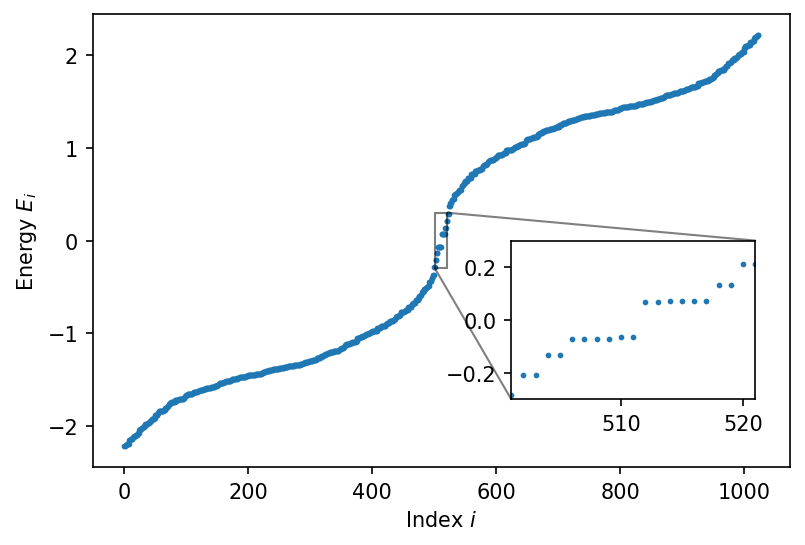

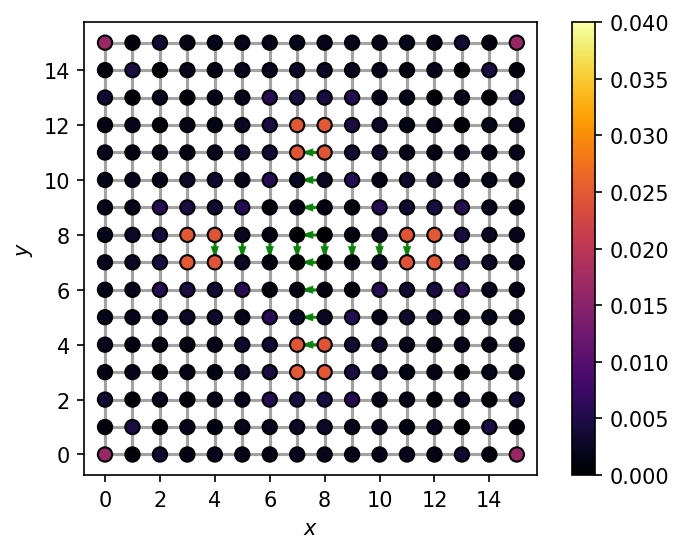

In [3]:
Ham_constructor = HamiltonianConstructor(mu, t, t, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)

N_shift = N // 4 + N % 2
flagged_bonds = [
    (idx, idx - 1) for idx in range(N_shift * N + N // 2, N_shift * N + N**2 // 2, N)
]

print("Flagged Vortex bonds = ", flagged_bonds)

for idx in range(N // 2):
    flagged_bonds.append((N_shift + (N // 2 - 1) * N + idx, N_shift + N // 2 * N + idx))

for bond in flagged_bonds:
    Ham_constructor.add_phase(H_direct_lattice, bond, phase_vortex, num_sites)
energies, states = scipy.linalg.eigh(H_direct_lattice)

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

fig, ax = plt.subplots()
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_{i}$")
ax.scatter(range(len(energies)), energies, s=3)

axins = ax.inset_axes([0.6, 0.15, 0.35, 0.35])
axins.scatter(range(len(energies)), energies, s=3, zorder=-100)
x1, x2, y1, y2 = gs_idx - 10, gs_idx + 10, -0.3, 0.3
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.savefig("./plots/square_lattice_four_pi_vortex_spectrum.svg")

plt.show()

gs_wave_function = states[:, gs_idx]
gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
gs_probabilities = np.zeros(shape=(num_sites, 1))
block_indices = [
    slice(block_idx * dim_H_BdG, (block_idx + 1) * dim_H_BdG)
    for block_idx in range(lattice.get_num_sites())
]

for site_idx in range(num_sites):
    gs_probabilities[site_idx] = np.sum(gs_probabilities_nambu[block_indices[site_idx]])

x_values = [k[0] for k in lattice_sites]
y_values = [k[1] for k in lattice_sites]

color_map = plt.get_cmap("inferno")
sc = lattice.plot(
    False, flagged_bonds=flagged_bonds, c=(gs_probabilities), cmap=color_map
)
plt.colorbar(sc)
sc.set_clim(0.0, 0.04)
plt.savefig("./plots/square_lattice_four_pi_vortex_prob_distr.svg")